In [1]:
from macros import *
from true_params import *
from mixtures.learn_mixture import *
from mixtures.mixture_checks import *
from mixtures.mixture_helpers import *

def array_printer(arr):
    for line in arr:
        print(str(line).replace("\n", ""))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
np.set_printoptions(formatter={"float": lambda x: "{0:+0.3f}".format(x)})
%load_ext autoreload
%autoreload 2

### Preliminaries


In [4]:
s = max(lds.s for lds in LDS_LIST)
kappa = max(*[lds.kappa for lds in LDS_LIST],
            *[op_norm(lds.get_observability(2*s))/min_sv(lds.get_controllability(s)) for lds in LDS_LIST])

print(f"s={s}, kappa={kappa}")

s=2, kappa=1.414213562373095


In [5]:
m, n, p = LDS_LIST[0].m, LDS_LIST[0].n, LDS_LIST[0].p

In [6]:
weights = [0.5, 0.5]
samples = generate_mixture_samples(LDS_LIST, weights, s, 1000000)

### Checking Randomly-Weighted Pi_M

In [7]:
random_weighting = get_random_weighting(m, p)
random_weighting

array([-0.540, -0.351, +0.814, +0.956])

<Axes: >

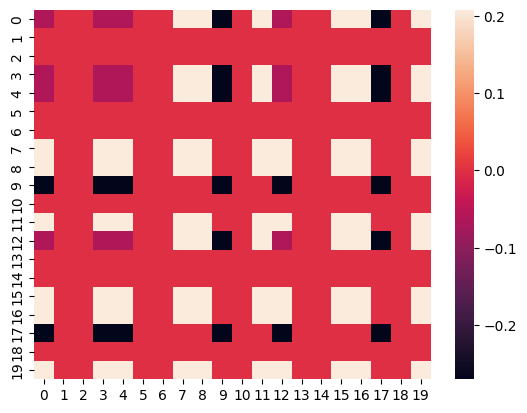

In [8]:
expected_eq_Pi_M = get_expected_Pi_M(LDS_LIST, weights, s)
expected_random_Pi_M = get_expected_random_weighted_Pi_M(LDS_LIST, weights, s, 1, random_weighting)
sns.heatmap(expected_random_Pi_M)

<Axes: >

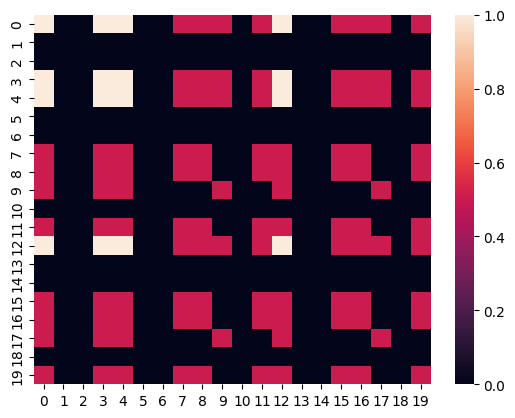

In [9]:
sns.heatmap(expected_eq_Pi_M)

In [10]:
eq_Pi_M = get_equal_weighted_Pi_M(samples, s)

100%|██████████| 5/5 [20:43<00:00, 248.77s/it]


100%|██████████| 5/5 [16:22<00:00, 196.50s/it]


<Axes: >

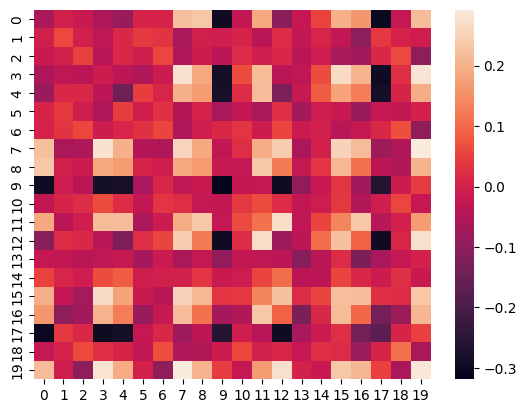

In [11]:
random_weighted_Pi_M = get_random_weighted_Pi_M(samples, s, 1, random_weighting)
sns.heatmap(random_weighted_Pi_M)

In [12]:
get_r2(eq_Pi_M, expected_eq_Pi_M), get_r2(random_weighted_Pi_M, expected_random_Pi_M)

(0.9990829486325865, 0.8430035467178464)